In [1]:
import pandas as pd

In [54]:
chipo = pd.read_csv('../csv/num_1/chipotle.tsv', sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### 문제
1. 가장 많이 주문한 item_name과 그 수량을 출력
2. item당 주문 총량을 구하고 바형 그래프로 표시
3. item_price 컬럼의 데이터에서 '$' 표시를 제거하고 float의 형태로 데이터 변환
4. order_id의 데이터 타입을 str으로 변경
5. 주문당 평균 계산 금액 출력

In [23]:
# 1. 가장 많이 주문한 item_name과 그 수량을 출력
order = chipo.groupby("item_name").sum()[['quantity']]
order.sort_values('quantity', ascending=False, inplace=True)
order.head(1)

C:\Users\ezen\AppData\Local\Temp\ipykernel_1460\2975559429.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = chipo.groupby("item_name").sum()[['quantity']]


,quantity
item_name,
Chicken Bowl,761


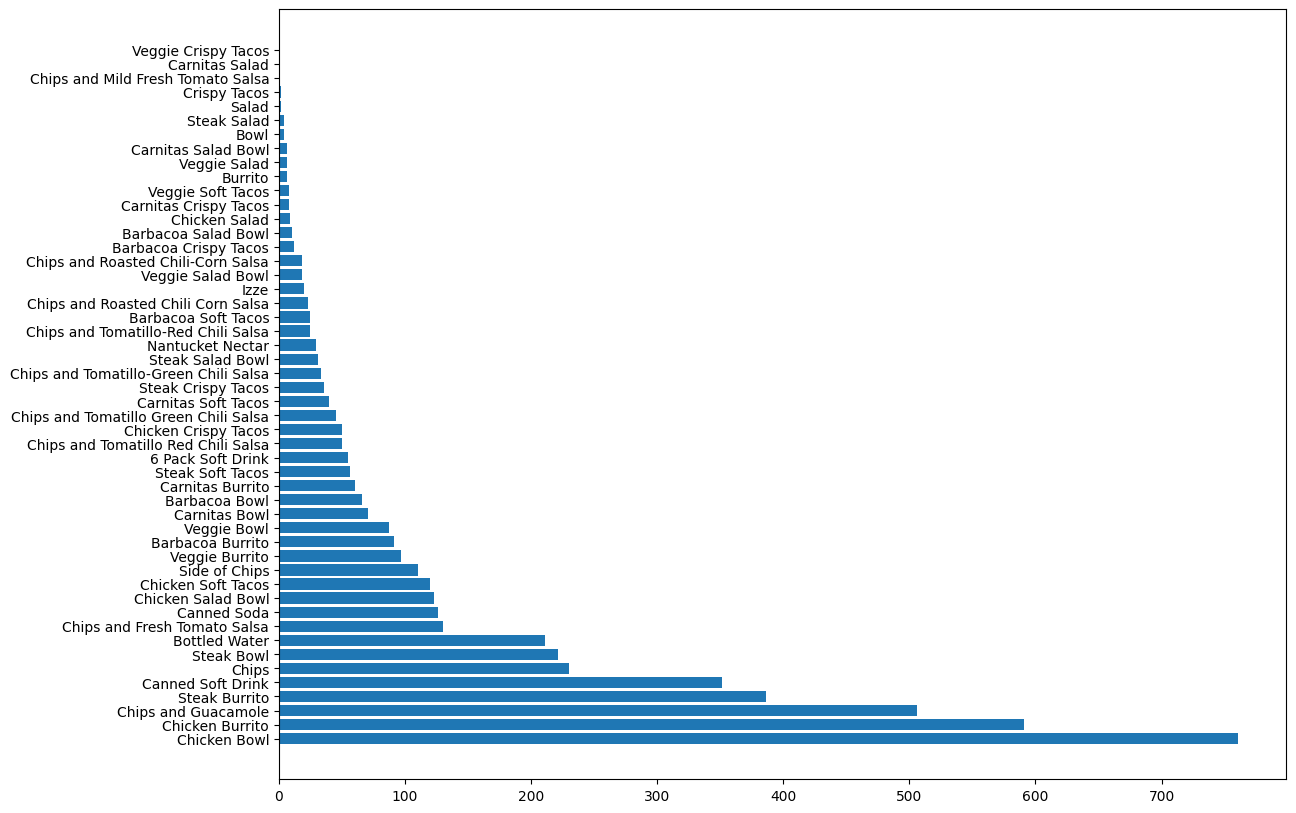

In [44]:
# 2. item당 주문 총량을 구하고 바형 그래프로 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.barh(order.index, order['quantity'])
plt.show()

# x = order.index
# y = order.values
# plt.barh(x, y)
# plt.show()

In [56]:
# 3. item_price 컬럼의 데이터에서 '$' 표시를 제거하고 float의 형태로 데이터 변환
# case 1
"""
chipo['item_price'].str.replace("$", "")
"""

# case 2
"""
chipo['item_price'].apply(lambda x : x.replace('$',''))
"""

# case 3
"""
def change(x):
    without_dollar = x.replace("$", "")
    result = float(without_dollar) # return float(without_dollar)
    return result

chipo['item_price'] = chipo['item_price'].apply(change)
"""

# case 4
chipo['item_price'] = chipo['item_price'].str.lstrip('$').astype('float')

In [61]:
# 4. order_id의 데이터 타입을 str으로 변경
chipo['order_id'] = chipo['order_id'].astype('str')

In [59]:
# 5. 주문당 평균 계산 금액 출력
chipo.groupby('order_id').sum()[['item_price']].mean()

C:\Users\ezen\AppData\Local\Temp\ipykernel_1460\3653078109.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('order_id').sum()[['item_price']].mean()


item_price    18.811429
dtype: float64